In [1]:
import tensorflow

from tensorflow. keras import layers
from tensorflow. keras import Model
from tensorflow. keras. models import Sequential
from tensorflow. keras.applications.vgg16 import VGG16

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
ImageDataGenerator??

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
train_augmentation = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
  )

In [6]:
train_generator = train_augmentation.flow_from_directory(
    directory='drive/My Drive/ex6_dataset/Training',
    target_size=(128,128),
    batch_size=128,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
validation_augmentation = ImageDataGenerator(
    rescale = 1./255
)

In [8]:
validation_generator = validation_augmentation.flow_from_directory(
    directory='drive/My Drive/ex6_dataset/Training',
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [9]:
# Getting pretrained model with imagenet weight by skipping top
conv_base = VGG16(input_shape=(128,128,3),include_top=False, weights= 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [11]:
# Freeze the conv base
for layer in conv_base. layers:
   layer. trainable = False

In [12]:
model=Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
history=model.fit(train_generator,steps_per_epoch=8,
                  epochs=5,
                  verbose=1,
                  validation_data=validation_generator)

Epoch 1/5
8/8 [==============================] - 582s 78s/step - loss: 3.0480 - accuracy: 0.5205 - val_loss: 0.5626 - val_accuracy: 0.6750
Epoch 2/5
8/8 [==============================] - 519s 71s/step - loss: 0.8509 - accuracy: 0.5889 - val_loss: 0.5360 - val_accuracy: 0.6975
Epoch 3/5
8/8 [==============================] - 552s 76s/step - loss: 0.6022 - accuracy: 0.6598 - val_loss: 0.4279 - val_accuracy: 0.7940
Epoch 4/5
8/8 [==============================] - 513s 71s/step - loss: 0.5517 - accuracy: 0.7121 - val_loss: 0.5172 - val_accuracy: 0.7160
Epoch 5/5
8/8 [==============================] - 559s 77s/step - loss: 0.5865 - accuracy: 0.6719 - val_loss: 0.3671 - val_accuracy: 0.8340


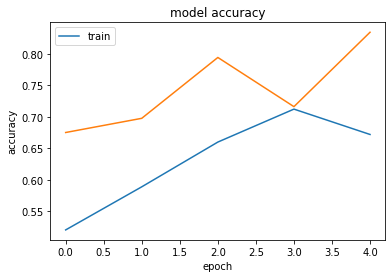

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()


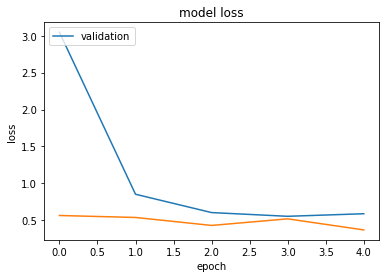

In [17]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.legend(['validation'],loc='upper left')

plt.show()